In [46]:
import pandas as pd
import numpy as np



In [47]:
# loading dataset
data = pd.read_csv('R:\Big Data Analytics  Lambton\Sem 3\AML 3104 Ishant Gupta\Assingment 1\dataset\Algerian_forest_fires_cleaned.csv')

In [48]:
#glimpse of the data
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### Basic Data Cleaning

In [49]:
#checking for null values
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [50]:
#checking for duplicates
data.duplicated().sum()

0

In [51]:
data['Classes'].value_counts()      # we can see that the Classes column has some errors in terms of extra spaces and all

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [52]:
# Cleaning the Classes column 
data['Classes'] = data['Classes'].str.lower().str.strip()

# Now let's see the value counts again
value_counts = data['Classes'].value_counts()
print(value_counts)

Classes
fire        137
not fire    106
Name: count, dtype: int64


In [53]:
# verifying datatypes and other potential errors 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [54]:
#looking at the all stats for all the columns
data.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,1.000000


In [55]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### Feature selection and Engineering

This dataset is of only 4 months of the same year, and this is not going to help our model. I'm removing these columns as it is not adding any value.

Classes column indicates fire/no fire but is not directly useful for predicting the FWI - Removing this also.

In [56]:
# Drop the target variable and other non-predictive columns
df = data.drop(columns=[ 'day', 'month', 'year', 'Classes'])


# Display the first few rows of the modified dataframe
df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


### EDA And Visualization

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


#### Univariate analysis

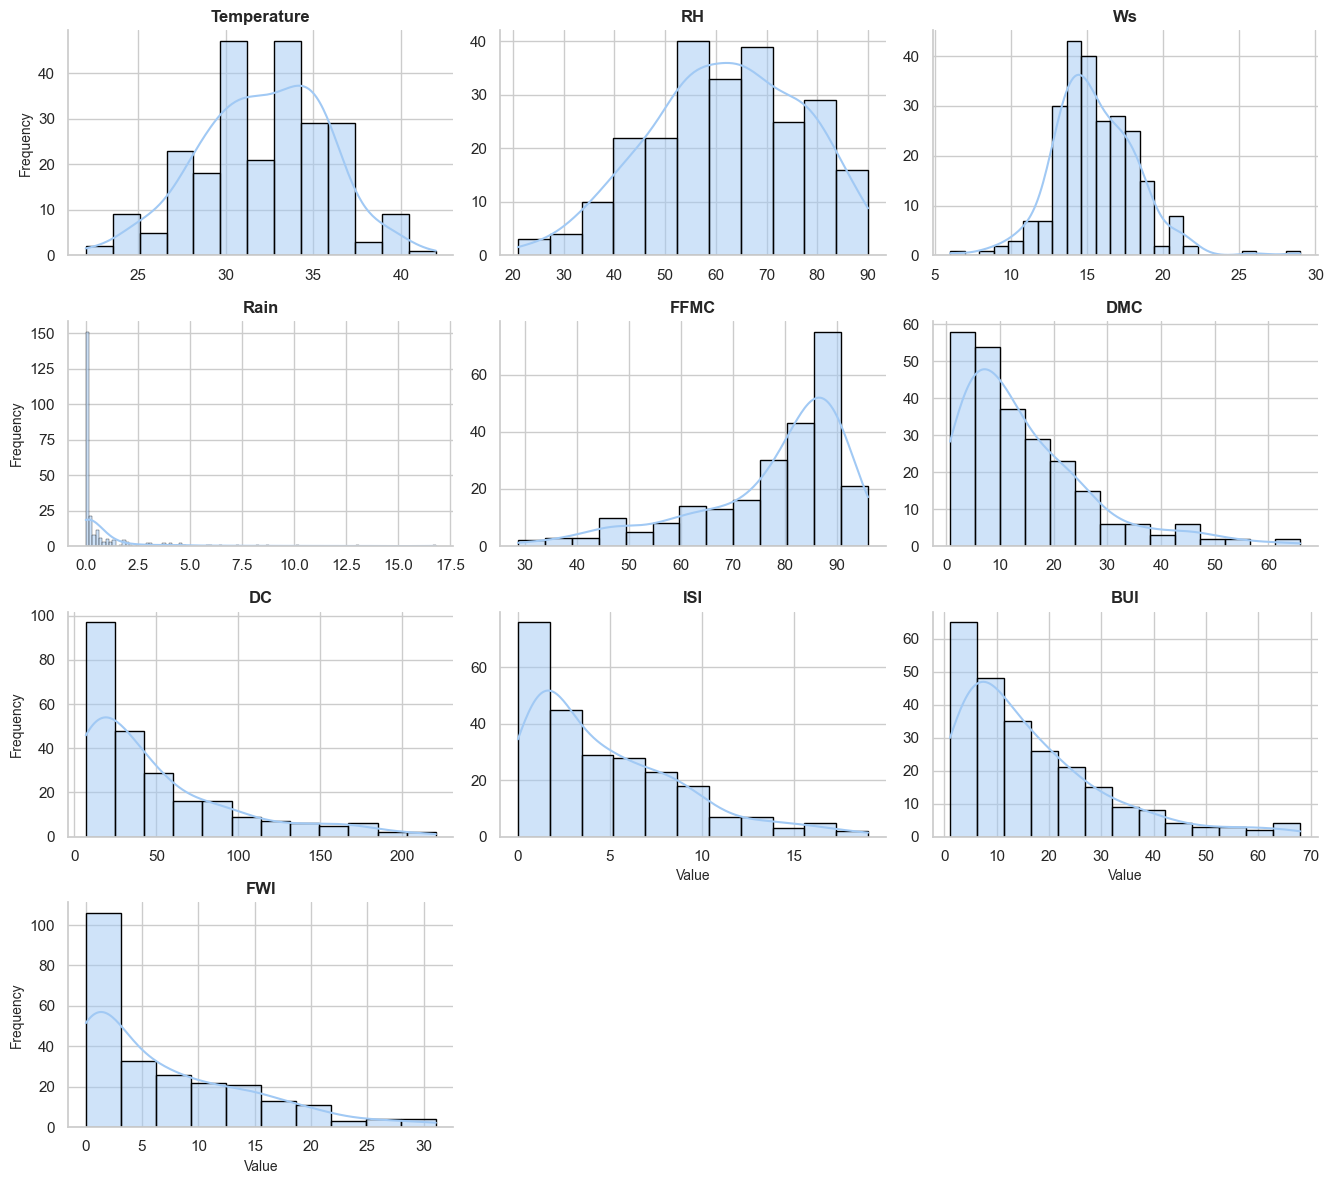

In [58]:
#ploting distributions graphs for numerical features
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

sns.set(style="whitegrid")

color_palette = sns.color_palette("pastel")

data_subset = df[numerical_features]

g = sns.FacetGrid(data=data_subset.melt(), col='variable', col_wrap=3, height=3, aspect=1.5, sharex=False, sharey=False)

g.map(sns.histplot, 'value', kde=True, color=color_palette[0], edgecolor='black')

g.set_titles(col_template='{col_name}', size=12, weight='bold')
g.set_axis_labels('Value', 'Frequency', fontsize=10)
g.fig.tight_layout(w_pad=1)  

plt.show()  

These distribution charts show their data frequencies in the datasets

Normal distribution - Temperatur, RH, Ws 

Left skewed - FFMC

Right skewed - All remaining charts

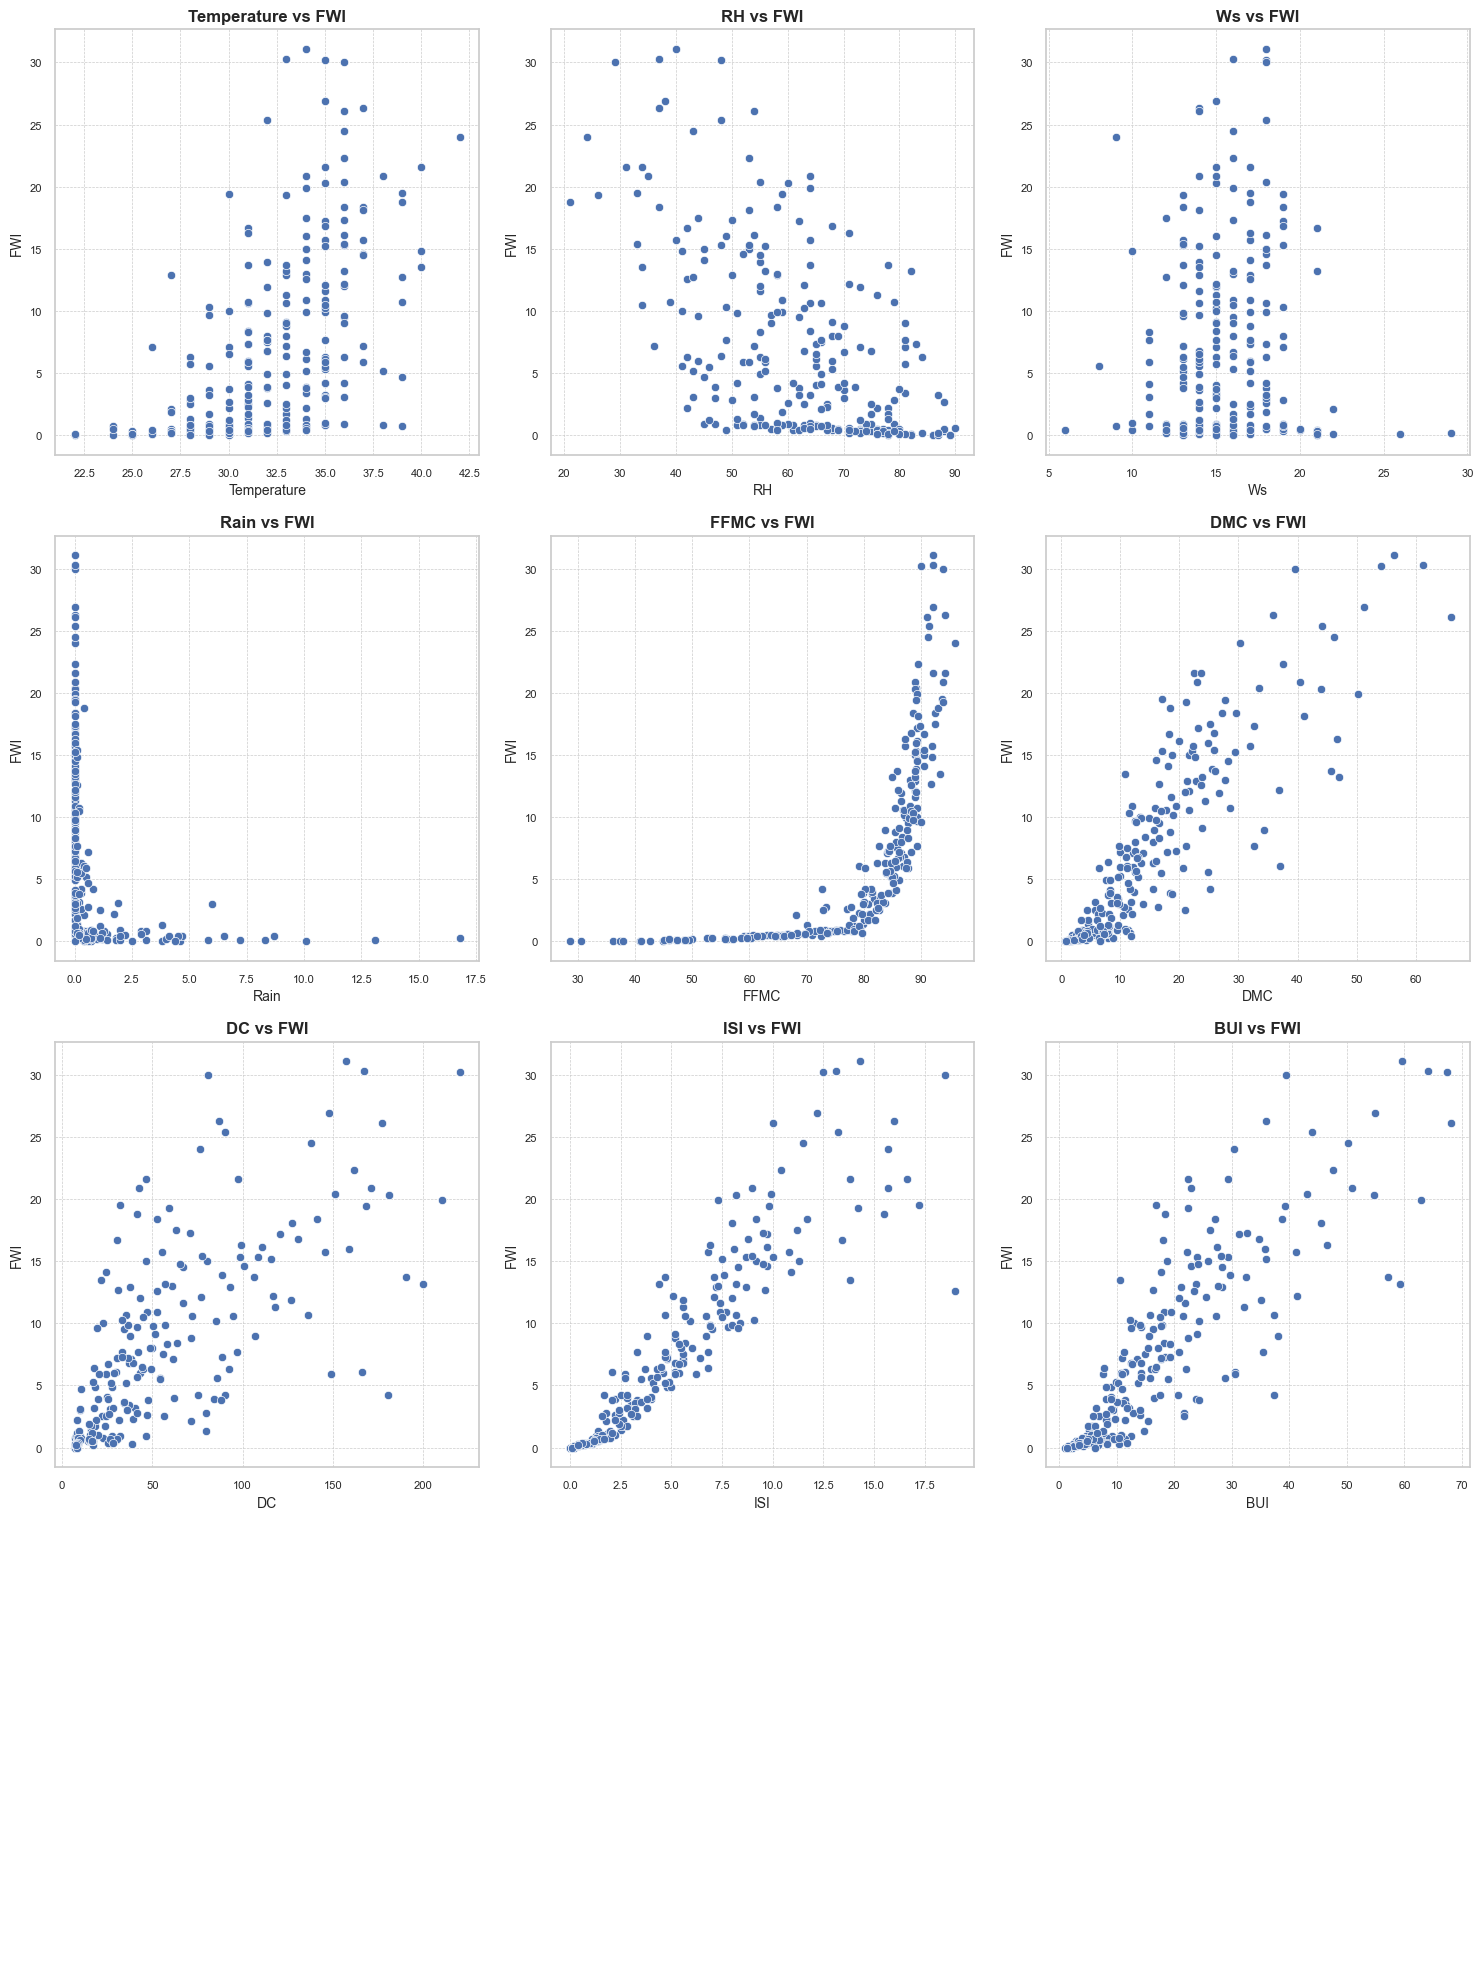

In [59]:

sns.set(style="whitegrid")

num_features = len(numerical_features)

num_cols = 3  
num_rows = math.ceil(num_features / num_cols)  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if feature != 'FWI':  
        sns.scatterplot(x=df[feature], y=df['FWI'], ax=axes[i])  
        axes[i].set_title(f'{feature} vs FWI', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(feature, fontsize=10)  
        axes[i].set_ylabel('FWI', fontsize=10)  
        axes[i].tick_params(axis='both', labelsize=8)  
        axes[i].grid(True, linestyle='--', linewidth=0.5) 
    else:
        axes[i].axis('off')  
        break  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()  


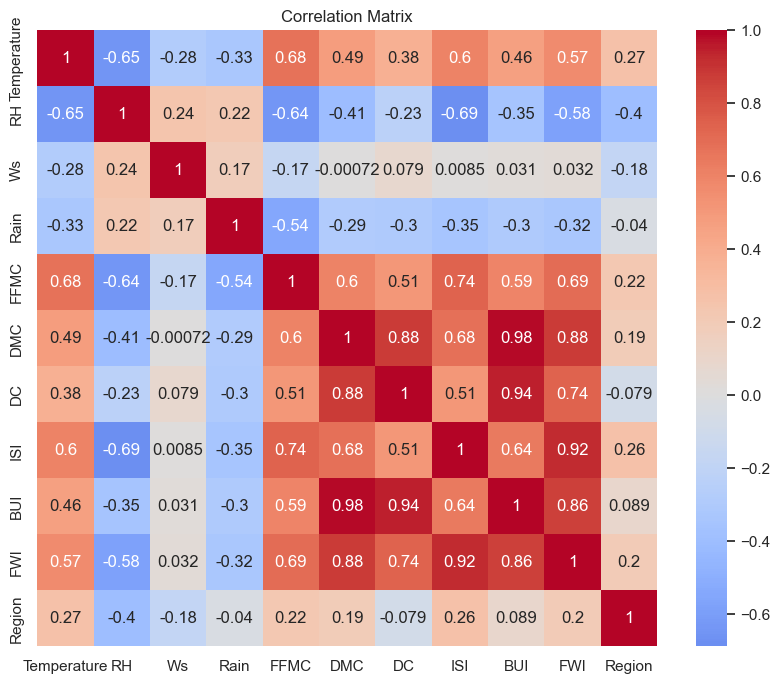

In [60]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_df = calculate_vif(df)
print(vif_df)


       Features         VIF
0   Temperature   99.837511
1            RH   31.406445
2            Ws   34.776930
3          Rain    1.653821
4          FFMC  105.226816
5           DMC  201.052935
6            DC   51.625840
7           ISI   52.403744
8           BUI  412.547369
9           FWI   76.981488
10       Region    3.168930


In [62]:
# Example: Remove 'BUI' and recalculate VIFs
df_reduced = df.drop(['BUI'], axis=1)
vif_df_reduced = calculate_vif(df_reduced.drop(columns=['FWI']))
print(vif_df_reduced)


      Features        VIF
0  Temperature  98.699324
1           RH  31.307310
2           Ws  34.764657
3         Rain   1.647853
4         FFMC  94.069298
5          DMC  19.433859
6           DC  13.256004
7          ISI   8.816336
8       Region   3.036389


In [63]:
df_reduced = df_reduced.drop(['Temperature'], axis=1)
vif_df_reduced = calculate_vif(df_reduced.drop(columns=['FWI']))
print(vif_df_reduced)

  Features        VIF
0       RH  28.609910
1       Ws  34.632070
2     Rain   1.529220
3     FFMC  34.906126
4      DMC  19.429672
5       DC  13.252289
6      ISI   8.806770
7   Region   2.954527


In [64]:
df_reduced = df_reduced.drop(['FFMC'], axis=1)
vif_df_reduced = calculate_vif(df_reduced.drop(columns=['FWI']))
print(vif_df_reduced)

  Features        VIF
0       RH  22.260076
1       Ws  31.680135
2     Rain   1.418420
3      DMC  19.429446
4       DC  13.195234
5      ISI   6.467490
6   Region   2.699423


In [65]:
df_reduced = df_reduced.drop(['Ws'], axis=1)
vif_df_reduced = calculate_vif(df_reduced.drop(columns=['FWI']))
print(vif_df_reduced)

  Features        VIF
0       RH   2.861655
1     Rain   1.328877
2      DMC  19.070912
3       DC  12.967443
4      ISI   4.499204
5   Region   2.653454


In [66]:
df = df_reduced.drop(['DMC'], axis=1)
vif_df_reduced = calculate_vif(df_reduced.drop(columns=['FWI']))
print(vif_df_reduced)

  Features        VIF
0       RH   2.861655
1     Rain   1.328877
2      DMC  19.070912
3       DC  12.967443
4      ISI   4.499204
5   Region   2.653454


### Model Development and Analysis

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline


Splitting the data in test train sets


In [68]:
X=df.drop('FWI', axis=1)

y=df['FWI']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(194, 5)
(49, 5)
(194,)
(49,)


In [71]:
#Scalling our dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression model

In [72]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)

print("Multiple Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("Multiple Linear Regression MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Multiple Linear Regression R2:", r2_score(y_test, y_pred_linear))


Multiple Linear Regression RMSE: 1.1202831758609257
Multiple Linear Regression MAE: 0.7362857080208615
Multiple Linear Regression R2: 0.9585912319951126


Polynomial Regression model

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2)
poly_reg = make_pipeline(poly, LinearRegression())

poly_reg.fit(X_train, y_train)

y_pred_poly = poly_reg.predict(X_test)

print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("Polynomial Regression MAE:", mean_absolute_error(y_test, y_pred_poly))
print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))


Polynomial Regression RMSE: 0.7570088073430878
Polynomial Regression MAE: 0.5830562465879795
Polynomial Regression R2: 0.9810923068176178


Applying ridge regression to balance any overfitting 

In [74]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("Ridge Regression MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))


Ridge Regression RMSE: 1.1202491229189042
Ridge Regression MAE: 0.7366237634421973
Ridge Regression R2: 0.9585937493388974


Lasso regression for removing unwanted features

In [75]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Lasso Regression MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))


Lasso Regression RMSE: 1.124911303605708
Lasso Regression MAE: 0.7680424154297901
Lasso Regression R2: 0.958248388443662


Decision Tree Regression model

In [76]:
from sklearn.tree import DecisionTreeRegressor

# Fit Decision Tree regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate model
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Regression MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree Regression R2:", r2_score(y_test, y_pred_dt))

Decision Tree Regression MSE: 2.663673469387754
Decision Tree Regression MAE: 0.9346938775510204
Decision Tree Regression R2: 0.9121144111654005


### Model Selection and Hyperparameter Tuning

In [77]:
from sklearn.pipeline import Pipeline

# Define models and hyperparameters for GridSearchCV
models = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'polynomial_regression': {
        'model': Pipeline([('poly', PolynomialFeatures()), ('linear', LinearRegression())]),
        'params': {
            'poly__degree': [2, 3, 4]
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1, 10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 15]
        }
    }
}

# Use GridSearchCV to find the best model and parameters
best_model = None
best_params = None
best_score = float('inf')  # Initialize with a high value for MSE

for model_name, model_params in models.items():
    gs = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring='neg_mean_squared_error')
    gs.fit(X, y)
    if gs.best_score_ < best_score:
        best_model = model_name
        best_params = gs.best_params_
        best_score = gs.best_score_

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Negative MSE:", best_score)

Best Model: decision_tree
Best Parameters: {'max_depth': 10}
Best Negative MSE: -4.5308377928949355


In [84]:
import pickle

best_params_dt = {'max_depth': 10}

# Initializing Decision Tree Regression with the best parameters
final_dt_model = DecisionTreeRegressor(**best_params_dt)

# Training the final Decision Tree Regression model 
final_dt_model.fit(X, y)

#File path for saving the pickle file
file_path = "R:/Big Data Analytics  Lambton/Sem 3/AML 3104 Ishant Gupta/Assingment 1/models/final_dt_model.pkl"

# Save the final Decision Tree Regression model as a pickle file
pickle.dump(final_dt_model, open(file_path, "wb"))

# Use the final Decision Tree Regression model for prediction
y_pred_dt = final_dt_model.predict(X_test)

# Evaluate model
print("Decision Tree Regression MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree Regression MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree Regression R2:", r2_score(y_test, y_pred_dt))


Decision Tree Regression MSE: 0.011802721088435386
Decision Tree Regression MAE: 0.040136054421768715
Decision Tree Regression R2: 0.9996105794855755
